# Part I - (2019 Ford Gobike System Data Exploration and Visualization)
## by (Robertson Otoo Asare)

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area which has about 500,0000 rides since it launch in 2017. The dataset is in csv format downloaded from the udacity classroom. <a href = 'https://www.google.com/url?q=https://video.udacity-data.com/topher/2020/October/5f91cf38_201902-fordgobike-tripdata/201902-fordgobike-tripdata.csv&sa=D&source=editors&ust=1658999769730737&usg=AOvVaw1YaxqLLA2FiNFe9vbI4-gS'>Download here<a/>


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv("201902-fordgobike-tripdata.csv")

In [3]:
# Display the first five rows of the DataFrame .head
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
# Display a basic summary of the DataFrame using .info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
#Display the count of missing values in the dataset
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [6]:
# Checking for duplicates
df.duplicated().sum()

0

##### Understanding some features

In [7]:
# Getting count of the member_gender feature using .value_counts()
df.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [8]:
# Getting count of the user_type feature using .value_counts()
df.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [9]:
# Getting count of bike_share_for_all_trip feature using .value_counts()
df.bike_share_for_all_trip.value_counts()

No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

## Cleaning Data

In [10]:
# making a copy of df
df_clean = df.copy()

### Define

#### issue 1: change features that are not in the correct dtype

In [11]:
df_clean = df.copy()
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'])

df_clean['start_station_id'] = df_clean['start_station_id'].astype('str')
df_clean['end_station_id'] = df_clean['end_station_id'].astype('str')
df_clean['bike_id'] = df_clean['bike_id'].astype('str')

df_clean['user_type'] = df_clean['user_type'].astype('category')
df_clean['member_gender'] = df_clean['member_gender'].astype('category')


### Test

In [12]:
df_clean.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183412 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

### Define

#### issue 2: create new columns for trip duration in minute, trip start date in yyyy-mm-dd format, trip start hour of the day, day of week and month


In [13]:
df_clean['duration_minute'] = df_clean['duration_sec']/60

df_clean['start_date'] = df_clean.start_time.dt.strftime('%Y-%m-%d')
df_clean['start_hourofday'] = df_clean.start_time.dt.strftime('%H')
df_clean['start_dayofweek'] = df_clean.start_time.dt.strftime('%A')
df_clean['start_month'] = df_clean.start_time.dt.strftime('%B')


### Test

In [14]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_minute,start_date,start_hourofday,start_dayofweek,start_month
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984.0,Male,No,869.750000,2019-02-28,17,Thursday,February
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,2535,Customer,NaN,NaN,No,708.683333,2019-02-28,18,Thursday,February
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972.0,Male,No,1030.900000,2019-02-28,12,Thursday,February
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989.0,Other,No,608.166667,2019-02-28,17,Thursday,February
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974.0,Male,Yes,26.416667,2019-02-28,23,Thursday,February


### Define

#### issue 3: create a new column calculating riders' age from 'member_birth_year'

In [15]:
# calculating age of member by subtracting the current year from member_birth_year
df_clean['member_age'] = 2022 - df_clean['member_birth_year']

#### Test

In [16]:
# Summary statistics of the dataset
df_clean.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,duration_minute,member_age
count,183412.000000,183412.000000,183412.000000,183412.000000,183412.000000,175147.000000,183412.000000,175147.000000
mean,726.078435,37.771223,-122.352664,37.771427,-122.352250,1984.806437,12.101307,37.193563
std,1794.389780,0.099581,0.117097,0.099490,0.116673,10.116689,29.906496,10.116689
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,1878.000000,1.016667,21.000000
25%,325.000000,37.770083,-122.412408,37.770407,-122.411726,1980.000000,5.416667,30.000000
50%,514.000000,37.780760,-122.398285,37.781010,-122.398279,1987.000000,8.566667,35.000000
75%,796.000000,37.797280,-122.286533,37.797320,-122.288045,1992.000000,13.266667,42.000000
max,85444.000000,37.880222,-121.874119,37.880222,-121.874119,2001.000000,1424.066667,144.000000


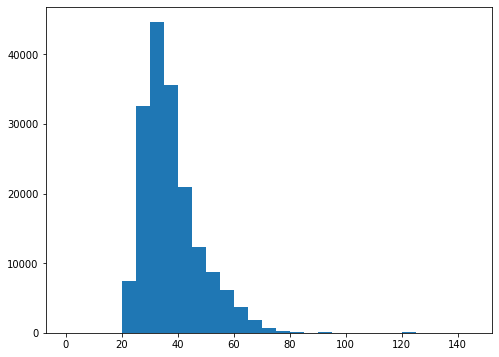

In [17]:
# plot the distribution of members' age, visually examine for some outliers over 100 yrs old

plt.figure(figsize=[8, 6])
bins = np.arange(0, df_clean['member_age'].max()+5, 5)
plt.hist(df_clean['member_age'].dropna(), bins=bins);

**insights:** Average age is between 30-40

### Define

#### issue 4: remove outlier ages from illustration of the distribution above

In [18]:
df_clean = df_clean.query('member_age <= 70')

#### Test

In [19]:
df_clean.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,duration_minute,member_age
count,174115.000000,174115.000000,174115.000000,174115.000000,174115.000000,174115.000000,174115.000000,174115.000000
mean,704.433242,37.770737,-122.351249,37.770931,-122.350823,1985.055567,11.740554,36.944433
std,1644.837572,0.101227,0.118592,0.101136,0.118156,9.560328,27.413960,9.560328
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,1952.000000,1.016667,21.000000
25%,323.000000,37.770083,-122.411901,37.770407,-122.411647,1980.000000,5.383333,30.000000
50%,511.000000,37.780760,-122.398279,37.781010,-122.397405,1987.000000,8.516667,35.000000
75%,789.000000,37.797320,-122.283093,37.797673,-122.285171,1992.000000,13.150000,42.000000
max,84548.000000,37.880222,-121.874119,37.880222,-121.874119,2001.000000,1409.133333,70.000000


**Insight:** Now the maximum member age is 70 as compared to the first .describe above which was 144

#### Define

#### issue 5: parse 'member_birth_year' and 'member_age' to integer instead of float type

In [20]:
df_clean['member_birth_year'] = df_clean['member_birth_year'].astype('int')
df_clean['member_age'] = df_clean['member_age'].astype('int')

#### Test

In [21]:
df_clean.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174115 entries, 0 to 183411
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174115 non-null  int64         
 1   start_time               174115 non-null  datetime64[ns]
 2   end_time                 174115 non-null  datetime64[ns]
 3   start_station_id         174115 non-null  object        
 4   start_station_name       173920 non-null  object        
 5   start_station_latitude   174115 non-null  float64       
 6   start_station_longitude  174115 non-null  float64       
 7   end_station_id           174115 non-null  object        
 8   end_station_name         173920 non-null  object        
 9   end_station_latitude     174115 non-null  float64       
 10  end_station_longitude    174115 non-null  float64       
 11  bike_id                  174115 non-null  object        
 12  user_type       

In [22]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_minute,start_date,start_hourofday,start_dayofweek,start_month,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984,Male,No,869.750000,2019-02-28,17,Thursday,February,38
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972,Male,No,1030.900000,2019-02-28,12,Thursday,February,50
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Subscriber,1989,Other,No,608.166667,2019-02-28,17,Thursday,February,33
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974,Male,Yes,26.416667,2019-02-28,23,Thursday,February,48
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Subscriber,1959,Male,No,29.883333,2019-02-28,23,Thursday,February,63


> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


### What is the structure of your dataset?

The original datasets contains 183412 individual trip records base on index with 16 columns/features. The columns can be group into 3 categories:

* trip duration: duration_sec, start_time, end_time
* station info: start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude
* member info (anonymized): bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip

Extracted features to aid in exploration and analysis:
*duration_minute, start_date, start_hourofday, start_dayofweek, start_month
member: member_age*


### What is/are the main feature(s) of interest in your dataset?

My interest is in exploring the bike trips, the duration and the pattern of renatl occurances, and how these relate to the riders characteristics, i.e. their gender, user type, and age to get insight of what people are using the bike sharing service for Based on the three questions provided in the option dataset i.e When are most trips taken in terms of time of day, day of the week, or month of the year? How long does the average trip take? Does the above depend on if a user is a subscriber or customer?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

* The trip's start date and duration information will aid to understand how long a trip last and when. 

* Demographic information eg: user type, gender and age will aid me find the main target customer groups and use the different groups to summarize the usage of bikes data to see if there is any regualr pattern relating to a specific group of riders.

## Univariate Exploration

###### A couple of plots to explore the trips distribution over hour-of-day and day-of-week



In [23]:
# trip distribution over day hours

plt.rcParams['figure.figsize'] = 8, 6
base_color = sb.color_palette('colorblind')[0]

# sb.countplot(data=df_clean, x='start_hourofday', color=base_color);
# plt.xlabel('Trip Start Hour of Day', fontsize = 15);
# plt.ylabel('Count', fontsize = 15);

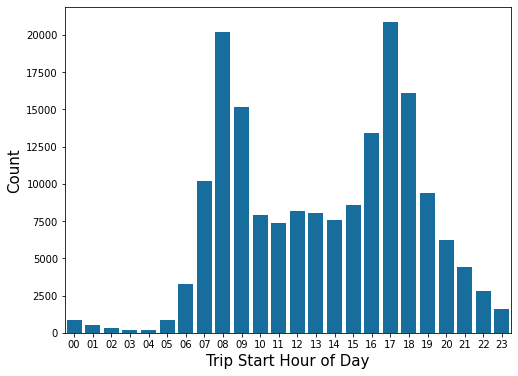

In [24]:
# trip distribution over weekdays
# issue 6: cast 'start_dayofweek' to category dtype

hour = ['00', '01','02','03','04','05','06','07','08','09','10','11',
           '12','13','14','15','16','17','18','19','20','21','22','23']

hourcat = pd.api.types.CategoricalDtype(ordered=True, categories=hour)
df_clean['start_hourofday'] = df_clean['start_hourofday'].astype(hourcat)

sb.countplot(data=df_clean, x='start_hourofday', color=base_color);
plt.xlabel('Trip Start Hour of Day', fontsize = 15);
plt.ylabel('Count', fontsize = 15);

**Insight:** Most trips are between 5-6 in the evening and 8-7 in the morning

In [25]:
def myCountPlot(df, xVar, color, order = None, figsize=[10,6]):
    '''The function takes 4 arguments: df which is the data,
    xVar which is the variable we want to plot color and figsize
    which will specify the size of our plot
    '''
    base_color = sb.color_palette()[0]
    plt.figure(figsize=figsize)
    sb.countplot(data=df, x = xVar, color=base_color, order= order)
    plt.title(f'Distribution of {xVar}'.title(), fontsize=16)
    plt.xlabel(xVar.title(), fontsize=14)
    
    plt.ylabel('Frequency'.title(), fontsize=14)

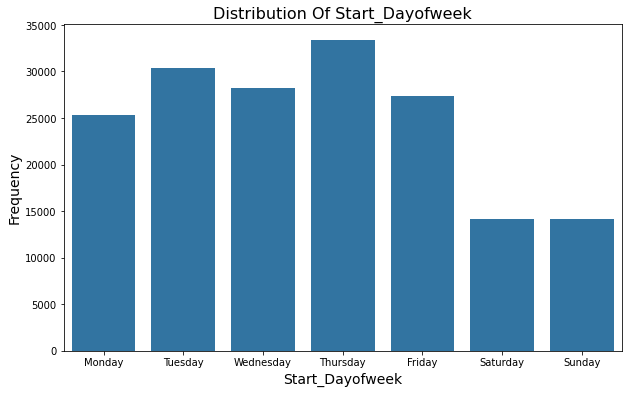

In [48]:
# trip distribution over weekdays
# issue 6: cast 'start_dayofweek' to category dtype

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
df_clean['start_dayofweek'] = df_clean['start_dayofweek'].astype(weekdaycat)

myCountPlot(df_clean, 'start_dayofweek', color = 'base_color',order = weekday);

**Insight:** Most trips are on Thursday followed by Tuesday and wednesday.


##### The  plots below are around members to see what makes up of the riders.

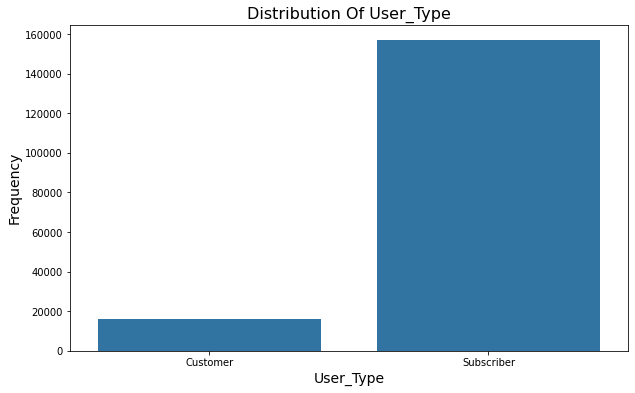

In [49]:
myCountPlot(df_clean, 'user_type', color = 'base_color');

**Insight:** Most user types are subscribers

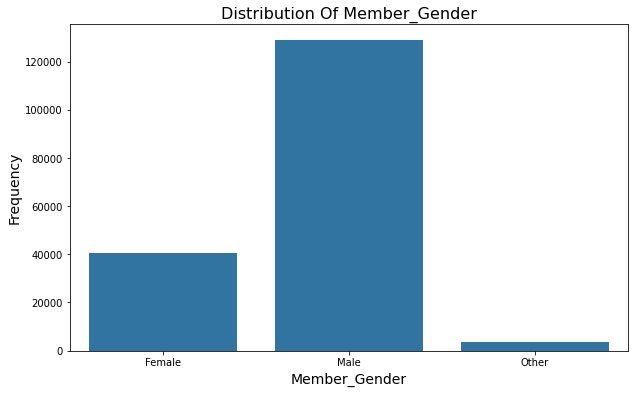

In [50]:
myCountPlot(df_clean, 'member_gender', color = 'base_color');

**Insight:** From the ilustration the most gender is Male as compared to Females and others

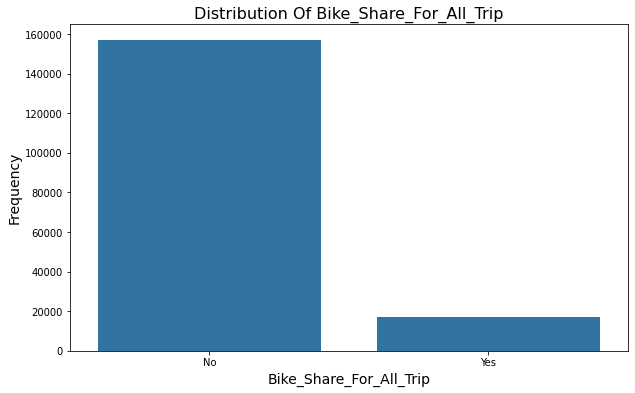

In [32]:
myCountPlot(df_clean, 'bike_share_for_all_trip', color = 'base_color');

**Insight:** Bike share for all trip has majority being No as compared to Yes

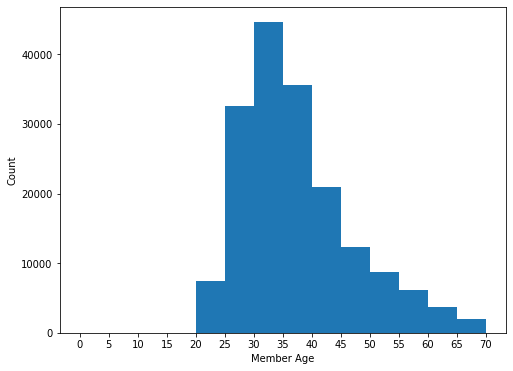

In [33]:
bins = np.arange(0, df_clean['member_age'].max()+5, 5)
plt.hist(data=df_clean, x='member_age', bins=bins);
plt.xticks(bins, bins);
plt.xlabel('Member Age');
plt.ylabel('Count');

**Insights:** From the distribution above Most members are around 25 to 40 years old

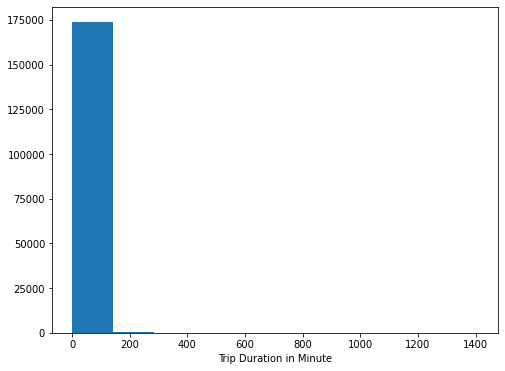

In [34]:
plt.hist(data=df_clean, x='duration_minute');
plt.xlabel('Trip Duration in Minute');

**Insights:** From the duration distribution above, it is positively skewed meaning a long time rental of 24 hrs while the majority of the rides that were short were within 200 mins. Will investigate into the most cases for a deeper understanding of what the distribution is like.

In [35]:
df_clean['duration_minute'].describe(percentiles=[.99])

count    174115.000000
mean         11.740554
std          27.413960
min           1.016667
50%           8.516667
99%          52.966667
max        1409.133333
Name: duration_minute, dtype: float64

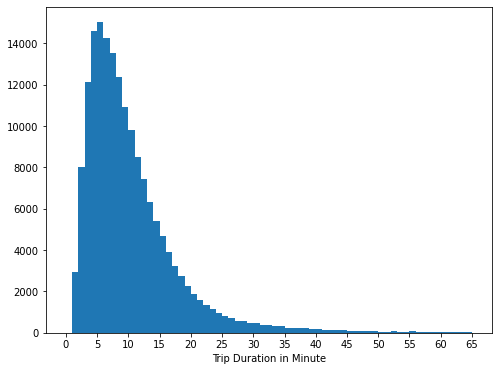

In [36]:
bins = np.arange(0, 66, 1)
ticks = np.arange(0, 66, 5)
plt.hist(data=df_clean, x='duration_minute', bins=bins);
plt.xticks(ticks, ticks);
plt.xlabel('Trip Duration in Minute');

**Insight:** 99% of the distribution were less than 60 minutes long with an average between 5 to 10 minutes range. All outliers long trips will be removed to allow focusing on the most common cases to identify the pattern.

In [37]:
# issue 8: remove outlier trip records where the duration was very long

df_clean = df_clean.query('duration_minute <= 66')
df_clean.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172902 entries, 4 to 183411
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             172902 non-null  int64         
 1   start_time               172902 non-null  datetime64[ns]
 2   end_time                 172902 non-null  datetime64[ns]
 3   start_station_id         172902 non-null  object        
 4   start_station_name       172709 non-null  object        
 5   start_station_latitude   172902 non-null  float64       
 6   start_station_longitude  172902 non-null  float64       
 7   end_station_id           172902 non-null  object        
 8   end_station_name         172709 non-null  object        
 9   end_station_latitude     172902 non-null  float64       
 10  end_station_longitude    172902 non-null  float64       
 11  bike_id                  172902 non-null  object        
 12  user_type       

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Most trips were around 8-7 in the morning and 5-6pm in the evening, there were more trips on work days (Mon-Fri) compared to weekends.

Also, there were more male riders than female, and most members were subscribers compared to customers. Majority of the riders are young i.e around 25 to 40 years old.

Most rides were quick and short, lasted between 5 to 10 minutes, though there were some very long outliers like 24hrs.

No transformation was needed.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

At first, The distribution of the trip duration was a little surprising. The .describe() and xticks() were employed to zoom in to a smaller range where most trip records fell, which made the distribution much clearer. In order to help focusing on the main cases of typical use of the system, I filtered out the outlier long trip records for the study using .query() function.

In [38]:
# save the clean data to a .csv file

df_clean.to_csv('fordGobike_2019.csv', index=False)

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

###### Investigating trip duration distribution  between customers and subscribers

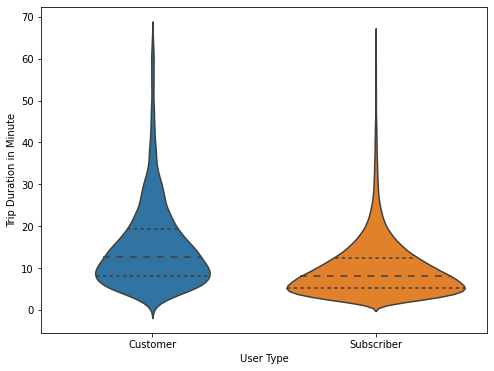

In [39]:
sb.violinplot(data=df_clean, x='user_type', y='duration_minute', inner='quartile');
plt.xlabel('User Type');
plt.ylabel('Trip Duration in Minute');


**Insights:** The distribution is much narrower for subscribers compared to customers on the short trip. 


##### How does the trip duration distribution vary by gender?


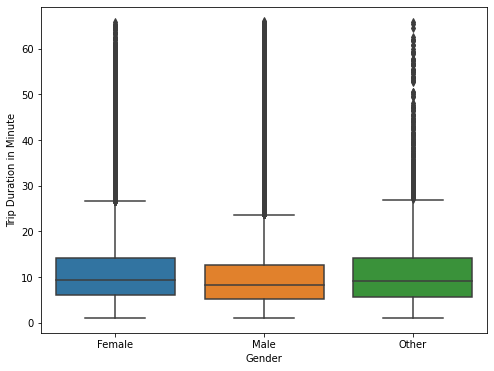

In [40]:
sb.boxplot(data=df_clean, x='member_gender', y='duration_minute');
plt.xlabel('Gender');
plt.ylabel('Trip Duration in Minute');

**insight:** There is no much of a difference between gender. Male riders tend to have shorter trips compared to female riders, shown by a smaller median and shorter interquatile range.

##### Average Trip Duration on Weekdays

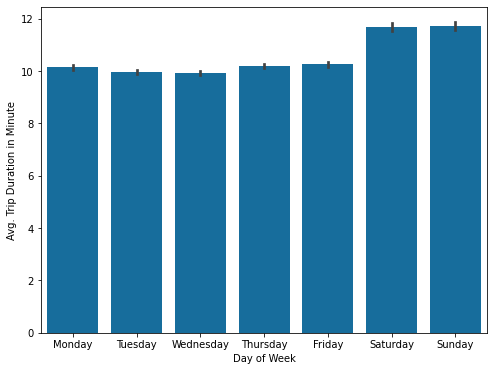

In [41]:
sb.barplot(data=df_clean, x='start_dayofweek', y='duration_minute', color=base_color);
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');

**insight:** The riding trips are short work days as compared to weekends. 

###### Comparing Member age by weekdays

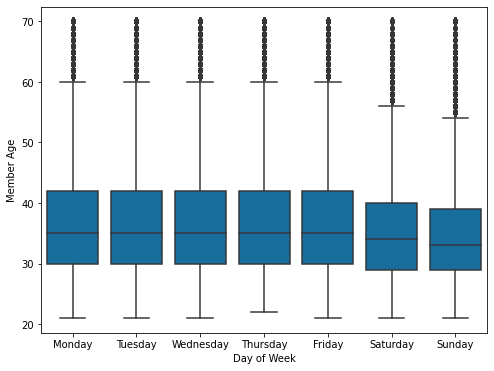

In [42]:
sb.boxplot(data=df_clean, x='start_dayofweek', y='member_age', color=base_color);
plt.xlabel('Day of Week');
plt.ylabel('Member Age');

**Insight:** Riders who rented the bikes on work days are slightly older than those who ride on weekends.

###### Usage between customers and subscribers on weekly bases


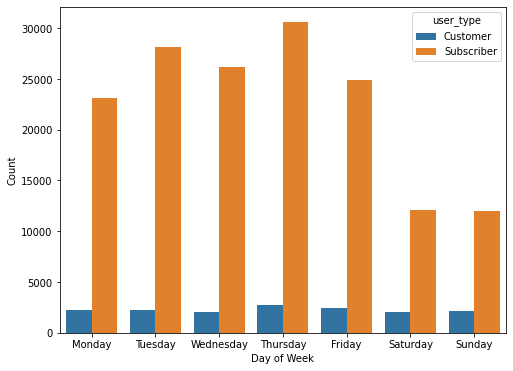

In [43]:
sb.countplot(data=df_clean, x='start_dayofweek', hue='user_type');
plt.xlabel('Day of Week');
plt.ylabel('Count');

**Insight:** Overall, there was much more subscriber usage than customers.

###### Usage between customers and subscribers on daily basis

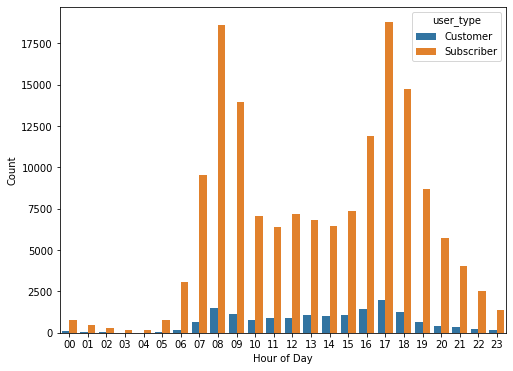

In [44]:
sb.countplot(data=df_clean, x='start_hourofday', hue='user_type');
plt.xlabel('Hour of Day');
plt.ylabel('Count');

**Insight:** Subscriber usage goes up when people go to work in the morning and getting off work in the afternoon. such was not observed among customers who tend to ride most in the evening and afternoon.


##### Member age between customers and subscribers



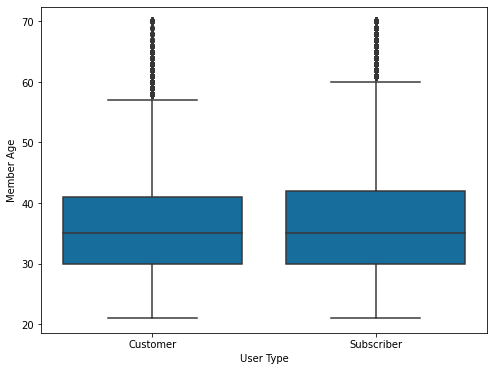

In [45]:
sb.boxplot(data=df_clean, x='user_type', y='member_age', color=base_color);
plt.xlabel('User Type');
plt.ylabel('Member Age');

**Insights:** Similar to the Member age by weekdays plot, subscribers who ride most often on workdays are slightly older than customers, with a wider range of ages.



### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

* Subscriber usage are more than customers usage.
* Riding pattern varies a lot between subscribers and customers. 
* Subscribers use the bike sharing system for work purpose thus most trips were on work days (Mon-Fri) and especially in the morning going to work and in the afternoon getting off work, whereas customers tend to ride for fun early evenings or in the afternoon.
* Subscriber users are slightly older than customer users who tend to take longer rides overall.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

It is surprising to see that subscribers are slightly older than customers on average but take much shorter rides.


## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

###### Investigate the average trip duration in weekdays between customers and subscribers

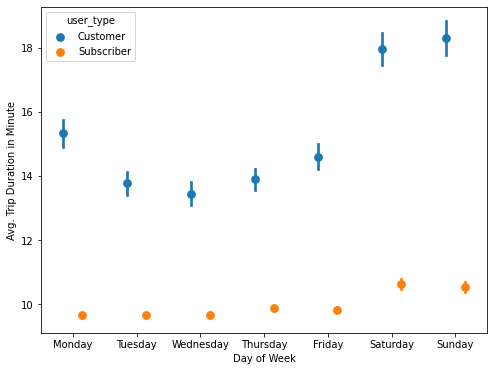

In [46]:
sb.pointplot(data=df_clean, x='start_dayofweek', y='duration_minute', hue='user_type', dodge=0.3, linestyles="");
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');

**Insight:** Computational analyses shows that subscribers ride much shorter trips compared to customers work days. Both user types have an obvious increase of trip duration on weekends, especially for customers.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The multivariate exploration confirmed some of the patterns discovered in the bivariate exploration and univariate exploration. Short period usage for subscribers relates to their high concentration on rush hours on work days, meaning they use the bike to attend to work. The customer use is more flexible as they use the bike for fun or leisure and greatly on weekends.

### Were there any interesting or surprising interactions between features?

The relationship between features are all supporting each other as they make sense when looked at together, there's no big surprise observed. Between male and female the usage habit is not that much throughout the exploration, which could be related to the imbalanced number of female riders compared to male ones.